In [1]:
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, InputLayer
from test import create_dataset

In [2]:
# df = pd.read_csv('dataset.csv')

# X = df['X'].to_numpy()
# X = X.reshape(-1, 1)

# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)

# Y = df['Y'].to_numpy()
# Y = Y.astype(int)

X, Y = create_dataset(nb = 20)

In [3]:
(x_train, x_test, y_train, y_test) = train_test_split(X.to_numpy(), Y.to_numpy(), train_size=0.75)

In [4]:
model = Sequential([
    InputLayer(input_shape=(1,)),
    Dense(1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_split = 0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )

Epoch 1/100
1/1 [==============================] - 0s 297ms/step - loss: 1.3930 - val_loss: 2.2795
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 1.3702 - val_loss: 2.3009
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 1.3481 - val_loss: 2.3225
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 1.3268 - val_loss: 2.3444
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 1.3063 - val_loss: 2.3664
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 1.2865 - val_loss: 2.3887


In [6]:
y_pred = model.predict(x_test)
y_pred

array([[-0.14623924],
       [ 0.2214447 ],
       [ 0.32565933],
       [-0.43957907],
       [-0.6102844 ]], dtype=float32)

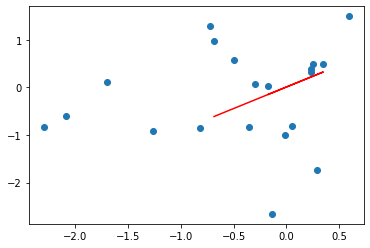

In [7]:
plt.scatter(X, Y)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [8]:
model.get_weights()

[array([[0.90399206]], dtype=float32), array([0.00999995], dtype=float32)]

In [ ]:
model.evaluate(x_test, y_test)